In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
PATH = "/home/qh53/llvm-pass-skeleton/data_proc/"

# Random Sampling Optimizations Orders

command: `./parsec-3.0/bin/run.sh [numer of samples] [length of passes] random` > `result_[length of passes].txt`

In [3]:
def reuslt_parse(l):
    r = []
    for s in l:
        f = open(f"{PATH}{s}.txt", "r")
        result = f.readlines()
        f.close()
        r.append([float(i.split(" ")[0]) for i in result[1::2]])
    return r
   

In [4]:
y = reuslt_parse(["result_10", "result_50","result_100","result_150","result_200","result_270"])


In [5]:
x=[10]*15 + [100]*15 + [270]*15

Text(0, 0.5, 'Running time in seconds')

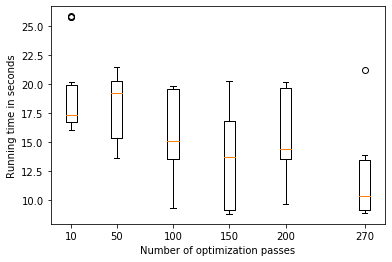

In [6]:
plt.boxplot(y,positions =[10,50, 100,150,200,270],widths=10)
plt.xlabel("Number of optimization passes")
plt.ylabel("Running time in seconds")
# plt.savefig("w.pdf")

# Hill Climbing 

command: `./parsec-3.0/bin/run.sh [numer of samples] [length of passes] hill`
evaluate every 10 passes: `./eval.sh` with `opt.txt` changed to the passes

In [7]:
f = open(f"{PATH}hill.txt", "r")
r = f.readlines()
f.close()

In [8]:
y_ = np.array([float(n) for n in r]).reshape([-1,10])
y_.std(1)
y_.mean(1)

array([16.4637, 14.607 , 14.6858, 14.4584, 13.7003, 14.1683, 10.7473,
       10.8201, 11.5477, 11.4758])

In [9]:
x = list(range(10,110,10))

Text(0, 0.5, 'Running time in seconds')

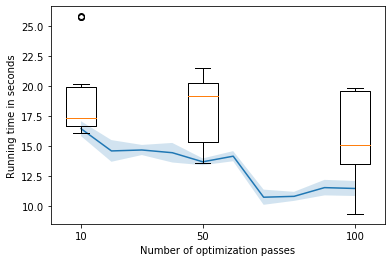

In [10]:
plt.figure()
plt.plot(x, y_.mean(1))

plt.fill_between(x, y_.mean(1) - y_.std(1), y_.mean(1) + y_.std(1),
                 alpha=0.2)
plt.boxplot(y[:3],positions =[10,50, 100],widths=10)
plt.xlabel("Number of optimization passes")
plt.ylabel("Running time in seconds")
# plt.savefig("wh.png")

# Linear model

collect data: `./parsec-3.0/bin/gen_data.sh`

In [11]:
f = open(f"{PATH}data.txt", "r")
l = f.readlines()
f.close()

In [12]:
opts = list(map(lambda s: s.split(" ")[-1][:-1],filter(lambda s: s[0]=="-" and s[1] != "-", l)))
opts = np.array(opts).reshape([-1,1])

len(opts)

168

In [13]:
cpi = list(map(lambda s: 0.55 if s.split(" ")[-2] == "" else float(s.split(" ")[-2]),filter(lambda s: "CPI" in s, l)))
cpi = np.array(cpi).reshape([-1,4]).mean(1).reshape([-1,1])
len(cpi)

168

In [14]:
cy1 = list(map(lambda s: float(s.split(" ")[-2]),filter(lambda s: "Cycles without execution [%]" in s, l)))
cy1 = np.array(cy1).reshape([-1,1])

len(cy1)

168

In [15]:
cy2 = list(map(lambda s: float(s.split(" ")[-2]),filter(lambda s: "Cycles without execution due to L1D" in s, l)))
cy2 = np.array(cy2).reshape([-1,1])

len(cy2)

168

In [16]:
cy3 = list(map(lambda s: float(s.split(" ")[-2]),filter(lambda s: "Cycles without execution due to L2 [%]" in s, l)))
cy3 = np.array(cy3).reshape([-1,1])

len(cy3)

168

In [17]:
cy4 = list(map(lambda s: float(s.split(" ")[-2]),filter(lambda s: "Cycles without execution due to memory loads [%]" in s, l)))
cy4 = np.array(cy4).reshape([-1,1])

len(cy4)

168

In [18]:

b = list(map(lambda s: float(s.split(" ")[-2]),filter(lambda s: "BR_MISP_RETIRED_ALL_BRANCHES" in s, l)))
b = np.array(b).reshape([-1,1])

len(b)

168

In [19]:
target = list(map(lambda s: float(s.split(" ")[0]),filter(lambda s: s.count(".") == 3 and s[0] != "[", l)))
target = np.array(target).reshape([-1,2])
target = target[:,1] - target[:,0]
len(target)


168

In [20]:
from sklearn.preprocessing import OrdinalEncoder


In [21]:
enc = OrdinalEncoder()

In [22]:
enc.fit(opts)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [23]:
opts = enc.transform(opts)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.linear_model import SGDClassifier,LogisticRegression

In [26]:
X = np.concatenate((opts,cy1 , cy2, cy3, cy4, b),1)

In [27]:
reg = LinearRegression(normalize=True).fit(X, target)
reg.score(X, target)

0.06938109632672651

In [28]:
X.shape

(168, 6)

In [29]:
target.shape

(168,)

In [30]:
np.corrcoef(np.concatenate((X, target.reshape([-1,1])),1), rowvar=False)[6]

array([ 0.19432154, -0.0036438 , -0.00383703, -0.00750014, -0.00406349,
        0.14211791,  1.        ])

In [31]:
cla = LogisticRegression(random_state=0).fit(X, (target>0).astype(float))

/home/qh53/.conda/envs/pytorch/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
cla.score(X, (target>0).astype(float))

0.5833333333333334